In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re

In [2]:
data_dir = 'C:/Users/36205/Desktop/FUdball/nagydata'
import os
os.chdir(data_dir)

#PremierLeague data kinyerése az excel fájlból és formázása
epl = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='E0')
epl = epl.drop(columns=['Referee'])
epl.drop(epl.iloc[:, 26:], inplace = True, axis = 1)
epl['Winner'] = ''
epl.loc[(epl['FTR'] == 'H'), 'Winner'] = epl['HomeTeam']  
epl.loc[(epl['FTR'] == 'D'), 'Winner'] = 'Draw'
epl.loc[(epl['FTR'] == 'A'), 'Winner'] = epl['AwayTeam'] 

#Bundesliga data kinyerése az excel fájlból és formázása
dbl = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='D1')
dbl.drop(dbl.iloc[:, 26:], inplace = True, axis = 1)
dbl['Winner'] = ''
dbl.loc[(dbl['FTR'] == 'H'), 'Winner'] = dbl['HomeTeam']  
dbl.loc[(dbl['FTR'] == 'D'), 'Winner'] = 'Draw'
dbl.loc[(dbl['FTR'] == 'A'), 'Winner'] = dbl['AwayTeam'] 

#LaLiga data kinyerése az excel fájlból és formázása
spl = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='SP1')
spl.drop(spl.iloc[:, 26:], inplace = True, axis = 1)
spl['Winner'] = ''
spl.loc[(spl['FTR'] == 'H'), 'Winner'] = spl['HomeTeam']  
spl.loc[(spl['FTR'] == 'D'), 'Winner'] = 'Draw'
spl.loc[(spl['FTR'] == 'A'), 'Winner'] = spl['AwayTeam'] 

#SeriaA data kinyerése az excel fájlból és formázása
isa = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='I1')
isa.drop(isa.iloc[:, 26:], inplace = True, axis = 1)
isa['Winner'] = ''
isa.loc[(isa['FTR'] == 'H'), 'Winner'] = isa['HomeTeam']  
isa.loc[(isa['FTR'] == 'D'), 'Winner'] = 'Draw'
isa.loc[(isa['FTR'] == 'A'), 'Winner'] = isa['AwayTeam'] 

#Ligue1 data kinyerése az excel fájlból és formázása
fl1 = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='F1')
fl1.drop(fl1.iloc[:, 26:], inplace = True, axis = 1)
fl1['Winner'] = ''
fl1.loc[(fl1['FTR'] == 'H'), 'Winner'] = fl1['HomeTeam']  
fl1.loc[(fl1['FTR'] == 'D'), 'Winner'] = 'Draw'
fl1.loc[(fl1['FTR'] == 'A'), 'Winner'] = fl1['AwayTeam'] 

In [3]:
epl

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner
0,E0,2021-08-13,20:00:00,Brentford,Arsenal,2,0,H,1,0,...,2,5,0,0,0,0,4.00,3.40,1.95,Brentford
1,E0,2021-08-14,12:30:00,Man United,Leeds,5,1,H,1,0,...,5,4,1,2,0,0,1.53,4.50,5.75,Man United
2,E0,2021-08-14,15:00:00,Burnley,Brighton,1,2,A,1,0,...,7,6,2,1,0,0,3.10,3.10,2.45,Brighton
3,E0,2021-08-14,15:00:00,Chelsea,Crystal Palace,3,0,H,2,0,...,5,2,0,0,0,0,1.25,5.75,13.00,Chelsea
4,E0,2021-08-14,15:00:00,Everton,Southampton,3,1,H,0,1,...,6,8,2,0,0,0,1.90,3.50,4.00,Everton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,E0,2022-04-02,17:30:00,Man United,Leicester,1,1,D,0,0,...,6,5,2,2,0,0,1.50,4.50,6.00,Draw
295,E0,2022-04-03,14:00:00,West Ham,Everton,2,1,H,1,0,...,2,4,1,1,0,1,1.75,3.80,4.50,West Ham
296,E0,2022-04-03,16:30:00,Tottenham,Newcastle,5,1,H,1,1,...,2,3,2,3,0,0,1.50,4.33,6.50,Tottenham
297,E0,2022-04-04,20:00:00,Crystal Palace,Arsenal,3,0,H,2,0,...,0,2,0,2,0,0,4.00,3.40,1.95,Crystal Palace


In [4]:
eplTeamList = ['Aston Villa', 'Arsenal', 'Brentford', 'Brighton', 'Burnley', 
            'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds',
            'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich',
            'Southampton', 'Tottenham', 'Watford', 'West Ham', 'Wolves']

dblTeamList = ['Augsburg', 'Bayern Munich', 'Bielefeld', 'Bochum', 'Dortmund', 
            'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Greuther Furth', 'Hertha',
            'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig',
            'Stuttgart', 'Union Berlin', 'Wolfsburg']

splTeamList = ['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 
            'Cadiz', 'Celta', 'Elche', 'Espanol', 'Getafe',
            'Granada', 'Levante', 'Mallorca', 'Osasuna', 'Real Madrid',
            'Sevilla', 'Sociedad', 'Valencia', 'Vallecano', 'Villarreal']

isaTeamList = ['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 
            'Genoa', 'Inter', 'Juventus', 'Lazio', 'Milan',
            'Napoli', 'Roma', 'Salernitana', 'Sampdoria', 'Sassuolo',
            'Spezia', 'Torino', 'Udinese', 'Venezia', 'Verona']

fl1TeamList = ['Angers', 'Brest', 'Bordeaux', 'Clermont', 'Lens', 
            'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz',
            'Monaco', 'Montpellier', 'Nantes', 'Nice', 'Paris SG',
            'Reims', 'Rennes', 'St Etienne', 'Strasbourg', 'Troyes']

In [5]:
def team_tablestats(team,league):

    HomeGames = league.loc[(league['HomeTeam'] == team)]
    AwayGames = league.loc[(league['AwayTeam'] == team)]

    HMP = len(HomeGames)
    AMP = len(AwayGames)
    MP = HMP + AMP

    HW = len(HomeGames.loc[ HomeGames['Winner'] == team])
    HD = len(HomeGames.loc[ HomeGames['Winner'] == 'Draw'])
    HL = len(HomeGames.loc[ (HomeGames['Winner'] != team)  &  (HomeGames['Winner'] != 'Draw') ])

    AW = len(AwayGames.loc[ AwayGames['Winner'] == team])
    AD = len(AwayGames.loc[ AwayGames['Winner'] == 'Draw'])
    AL = len(AwayGames.loc[ (AwayGames['Winner'] != team)  &  (AwayGames['Winner'] != 'Draw') ])

    W = HW + AW
    D = HD + AD
    L = HL + AL
                        
    HGF = HomeGames['FTHG'].sum()
    AGF = AwayGames['FTAG'].sum()
    GF = HGF + AGF

    HGA = HomeGames['FTAG'].sum()
    AGA = AwayGames['FTHG'].sum()
    GA = HGA + AGA

    HGD = HGF - HGA 
    AGD = AGF - AGA
    GD = GF - GA

    HPts = HW * 3 + HD
    APts = AW * 3 + AD
    Pts  = HPts + APts
    
    teamdata = [team,MP,W,D,L,GF,GA,GD,Pts]    
    return teamdata




def generateTable(teamList,league):
    tableHead = pd.DataFrame(columns=['Club','MP','W','D','L','GF','GA','GD','Pts'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_tablestats(i,league)
    return tableHead

In [6]:
#PremierLeagueTable
eplTable = generateTable(eplTeamList, epl)
eplTable = eplTable.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])

#Ligue1Table
fl1Table = generateTable(fl1TeamList, fl1)
fl1Table = fl1Table.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])

#BundesligaTable
dblTable = generateTable(dblTeamList, dbl)
dblTable = dblTable.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])

#LaLigaTable
splTable = generateTable(splTeamList, spl)
splTable = splTable.sort_values(by = ['Pts'], ascending=[0])

#SeariaATable
isaTable = generateTable(isaTeamList, isa)
isaTable = isaTable.sort_values(by = ['Pts'], ascending=[0])

In [7]:
def team_cornerstats(team,league):
    
    HomeGames = league.loc[(league['HomeTeam'] == team)]
    AwayGames = league.loc[(league['AwayTeam'] == team)]
    AllGames = HomeGames.append(AwayGames, ignore_index=True)
    
    HomeMatchPlayed = len(HomeGames)
    AwayMatchPlayed = len(AwayGames)
    AllMatchPlayed = len(AllGames)
    
    
    
    HomeCornersAvg = round(HomeGames['HC'].mean(),1)
    HomeCornersStd = round(HomeGames['HC'].std(),1)
    HomeCornersMin = HomeGames['HC'].min() 
    HomeCorners25 = round(np.quantile(HomeGames['HC'], .25), 1)
    HomeCorners50 = round(np.quantile(HomeGames['HC'], .50), 1)
    HomeCorners75 = round(np.quantile(HomeGames['HC'], .75), 1)
    HomeCornersMax = HomeGames['HC'].max()
    HomeCornersSum = HomeGames['HC'].sum()
    
    HomeCornerData = [team,HomeCornersAvg,HomeCornersStd,HomeCornersMin,
                      HomeCorners25,HomeCorners50,HomeCorners75,HomeCornersMax,HomeCornersSum]
    
    
    AwayCornersAvg = round(AwayGames['HC'].mean(),1)
    AwayCornersStd = round(AwayGames['HC'].std(),1)
    AwayCornersMin = AwayGames['HC'].min() 
    AwayCorners25 = round(np.quantile(AwayGames['HC'], .25), 1)
    AwayCorners50 = round(np.quantile(AwayGames['HC'], .50), 1)
    AwayCorners75 = round(np.quantile(AwayGames['HC'], .75), 1)
    AwayCornersMax = AwayGames['HC'].max()
    AwayCornersSum = AwayGames['AC'].sum()
    
    AwayCornerData = [team,AwayCornersAvg,AwayCornersStd,AwayCornersMin,
                      AwayCorners25,AwayCorners50,AwayCorners75,AwayCornersMax,AwayCornersSum]
    

    AllCornersAvg = round(AllGames['HC'].mean(),1)
    AllCornersStd = round(AllGames['HC'].std(),1)
    AllCornersMin = AllGames['HC'].min() 
    AllCorners25 = round(np.quantile(AllGames['HC'], .25), 1)
    AllCorners50 = round(np.quantile(AllGames['HC'], .50), 1)
    AllCorners75 = round(np.quantile(AllGames['HC'], .75), 1)
    AllCornersMax = AllGames['HC'].max()
    AllCornersSum = AllGames['HC'].sum()
    
    AllCornerData = [team,AllCornersAvg,AllCornersStd,AllCornersMin,
                      AllCorners25,AllCorners50,AllCorners75,AllCornersMax,AllCornersSum]
    
    #return [HomeCornerData,AwayCornerData,AllCornerData]
    return [HomeCornerData,AwayCornerData,AllCornerData]
    
#     a = round(HomeGames['HC'].mean(),1)   
#     b = round(HomeGames['HC'].std(),1)
#     c = HomeGames['HC'].min() 
#     d = round(np.quantile(HomeGames['HC'], .25), 1)
#     e = round(np.quantile(HomeGames['HC'], .50), 1)
#     f = round(np.quantile(HomeGames['HC'], .75), 1)
#     g = HomeGames['HC'].max()
    

#     AwayCornersAvg = (AwayCorners / AwayMatchPlayed).round(2)
#     AwayDescribe = AwayGames['AC'].describe()
#     AwayDatas = AwayDescribe[-7:]
#     AwayDatas = [round(num, 3) for num in AwayDatas]
    
#     AllCorners = HomeCorners +  AwayCorners
#     AllCornersAvg = (AllCorners / AllMatchPlayed).round(2)
#     AllCornersArray = HomeGames['HC'].append(AwayGames['AC'])
#     AllDescribe = AllCornersArray.describe()
#     AllDatas = AllDescribe[-7:]
#     AllDatas = [round(num, 3) for num in AllDatas]
    

    
    
    #print('HC:',HomeCorners,'HCAVG:',HomeCornersAvg,'\nAC:',AwayCorners,'ACAVG:',AwayCornersAvg,'\nCAVG:',AllCornersAvg)
    #print(HomeDatas,AwayDatas,AllDatas)
    #print(HomeDescribe,'\n',AwayDescribe,'\nCAVG',AllCornersAvg)
    #cornerdata = [team,a,b,c,d,e,f,g]


def generateCornerTable(teamList,league,ind):
    tableHead = pd.DataFrame(columns=['Team','Mean','Std','Min','25%','50%','75%','Max','Sum'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_cornerstats(i,league)[ind]
    return tableHead

In [8]:
# asd = team_cornerstats('Arsenal',epl)
# asd
eplCornerTable = generateCornerTable(eplTeamList, epl,2)
eplCornerTable


,Team,Mean,Std,Min,25%,50%,75%,Max,Sum
0,Aston Villa,5.2,2.5,2,3.0,5.0,6.8,11,155
1,Arsenal,5.7,3.7,0,3.0,5.0,8.0,14,164
2,Brentford,5.7,3.4,1,3.0,5.0,8.0,14,176
3,Brighton,6.2,2.3,1,4.2,6.0,7.8,11,187
4,Burnley,6.1,3.0,1,4.0,6.0,8.0,14,177
5,Chelsea,6.3,3.7,0,4.0,5.0,9.0,15,184
6,Crystal Palace,5.3,2.6,0,3.2,5.0,7.0,10,159
7,Everton,5.6,2.2,2,4.0,5.0,7.0,10,161
8,Leicester,5.5,3.1,1,3.0,5.0,7.2,14,154
9,Leeds,5.1,2.0,1,4.0,5.0,6.0,10,158


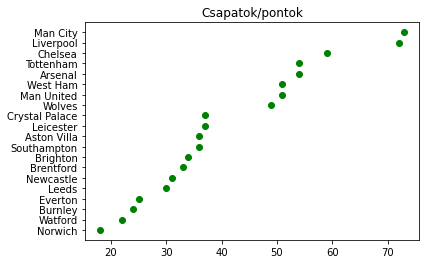

In [9]:
#x = np.arange(len(eplTable['Pts']))
x = np.array(eplTable['Pts'][::-1])
y = np.array(eplTable['Club'][::-1])

#df[::-1]


ya =np.array(eplTable['Pts'][::-1] + 5*3)

#z = np.sort(df)

plt.title("Csapatok/pontok")

plt.scatter(x ,y, color="green")
#plt.scatter(x, ya, color="blue")
plt.show()

In [10]:
#kigyűjtöttem a nyertes oddsokat
epl['WOdds'] = ''
epl.loc[(epl['FTR'] == 'H'), 'WOdds'] = epl['B365H'].astype('float')
epl.loc[(epl['FTR'] == 'D'), 'WOdds'] = epl['B365D'].astype('float')
epl.loc[(epl['FTR'] == 'A'), 'WOdds'] = epl['B365A'].astype('float')
epl = epl.astype({'WOdds':'float'})
epl

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner,WOdds
0,E0,2021-08-13,20:00:00,Brentford,Arsenal,2,0,H,1,0,...,5,0,0,0,0,4.00,3.40,1.95,Brentford,4.00
1,E0,2021-08-14,12:30:00,Man United,Leeds,5,1,H,1,0,...,4,1,2,0,0,1.53,4.50,5.75,Man United,1.53
2,E0,2021-08-14,15:00:00,Burnley,Brighton,1,2,A,1,0,...,6,2,1,0,0,3.10,3.10,2.45,Brighton,2.45
3,E0,2021-08-14,15:00:00,Chelsea,Crystal Palace,3,0,H,2,0,...,2,0,0,0,0,1.25,5.75,13.00,Chelsea,1.25
4,E0,2021-08-14,15:00:00,Everton,Southampton,3,1,H,0,1,...,8,2,0,0,0,1.90,3.50,4.00,Everton,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,E0,2022-04-02,17:30:00,Man United,Leicester,1,1,D,0,0,...,5,2,2,0,0,1.50,4.50,6.00,Draw,4.50
295,E0,2022-04-03,14:00:00,West Ham,Everton,2,1,H,1,0,...,4,1,1,0,1,1.75,3.80,4.50,West Ham,1.75
296,E0,2022-04-03,16:30:00,Tottenham,Newcastle,5,1,H,1,1,...,3,2,3,0,0,1.50,4.33,6.50,Tottenham,1.50
297,E0,2022-04-04,20:00:00,Crystal Palace,Arsenal,3,0,H,2,0,...,2,0,2,0,0,4.00,3.40,1.95,Crystal Palace,4.00


In [11]:
eplTable = eplTable.reset_index()
eplTable.columns


Index(['index', 'Club', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')

In [12]:
eplTable

,index,Club,MP,W,D,L,GF,GA,GD,Pts
0,11,Man City,30,23,4,3,70,18,52,73
1,10,Liverpool,30,22,6,2,77,20,57,72
2,5,Chelsea,29,17,8,4,58,23,35,59
3,16,Tottenham,30,17,3,10,52,37,15,54
4,1,Arsenal,29,17,3,9,44,34,10,54
5,18,West Ham,31,15,6,10,51,40,11,51
6,12,Man United,30,14,9,7,49,41,8,51
7,19,Wolves,31,15,4,12,33,27,6,49
8,6,Crystal Palace,30,8,13,9,42,38,4,37
9,8,Leicester,28,10,7,11,43,47,-4,37


In [15]:
newscastleCornerTable = eplCornerTable.loc[(eplCornerTable['Team'] == 'Newcastle')]

newscastleCornerTable

#HomeGames = league.loc[(league['HomeTeam'] == team)]

,Team,Mean,Std,Min,25%,50%,75%,Max,Sum
13,Newcastle,4.6,2.9,0,3.0,4.0,6.0,12,139


In [14]:
##Szabályok bizonyos ligákban pontazonosság esetén

# Premier League
# -Goal difference
# -Higher number of goals scored

# Ligue 1
# -Goal difference
# -Higher number of goals scored

# Bundesliga
# -Goal difference
# -Goals scored for the entire season
# -Head-to-head results (total points accumulated)
# -Head-to-head goals scored
# -Head-to-head away goals scored
# -Total away goals scored for the entire season

# La Liga
# -Head-to-head points between tied teams
# -Head-to-head goal difference between tied teams
# -Goal difference

# Serie A
# -Head-to-head points
# -Head-to-head goal difference
# -Goal difference
# -Higher number of goals scored

##Jelentések

# Div = League Division
# Date = Match Date (dd/mm/yy)
# HomeTeam = Home Team
# AwayTeam = Away Team
# FTHG = Full Time Home Team Goals
# FTAG = Full Time Away Team Goals
# FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG = Half Time Home Team Goals
# HTAG = Half Time Away Team Goals
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HC = Home Team Corners
# AC = Away Team Corners
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards

# B365H = Bet365 home win odds
# B365D = Bet365 draw odds
# B365A = Bet365 away win odds